<a href="https://colab.research.google.com/github/UchihaItachi-1/Iceberg-detection/blob/main/Copy_of_ice_berg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh

--2021-03-23 06:31:44--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh [following]
--2021-03-23 06:31:44--  https://repo.anaconda.com/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   128MB/s    in 4.5s    

2021-03-23 06:31:48 (122 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ sa

In [ ]:
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh

In [ ]:
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local

PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anaconda, Inc.
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: intel-openmp-2018.0.0-hc7b2577_8 ...
installing: libgcc-ng-7.2.0-h7cc24e2_2 ...
installing: libgfortran-ng-7.2.0-h9f7466a_2 ...
installing: libstdcxx-ng-7.2.0-h7a57d05_2 ...
installing: bzip2-1.0.6-h9a117a8_4 ...
installing: expat-2.2.5-he0dffb1_0 ...
installing: gmp-6.1.2-h6c8ec71_1 ...
installing: graphite2-1.3.10-hf63cedd_1 ...
installing: icu-58.2-h9c2bf20_1 ...
installing: jbig-2.1-hdba287a_0 ...
installing: jpeg-9b-h024ee3a_2 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: libsodium-1.0.15-hf101ebd_0 ...
installing: libtool-2.4.6-h544aabb_3 ...
installing: libxcb-1.12-hcd93eb1_4 ...
installing: lzo-2.10-h49e0be7_2 ...
installing: mkl-2018.0.1-h19d6760_4 ...
installing: ncurses-6.0-h9df7e31_2 ...
installing: openssl-1.0.2n-hb7f436b_0 ...
installing: patchelf-0.9-hf79760b_2 ...
i

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

In [ ]:
import cv2 as cv
import numpy as np
from IPython.display import Image
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


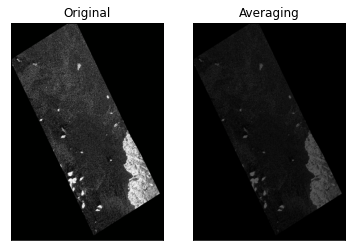

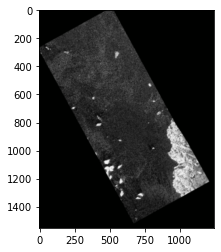

In [ ]:
img = cv.imread('gdrive/My Drive/test.bmp')
kernel = np.ones((3,3),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img , aspect='auto'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, aspect='auto'), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
#blurImg = cv.blur(img,(10,10)) 
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurImg = cv.GaussianBlur(img, (11, 11), 0) 
plt.imshow(blurImg)

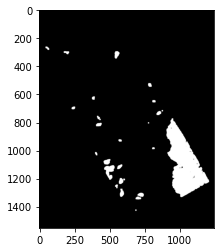

In [ ]:
blurred = blurImg
thresh = cv.threshold(blurred, 100, 255, cv.THRESH_BINARY)[1]
thresh = cv.erode(thresh, None, iterations=2)
thresh = cv.dilate(thresh, None, iterations=4)
plt.imshow(thresh)

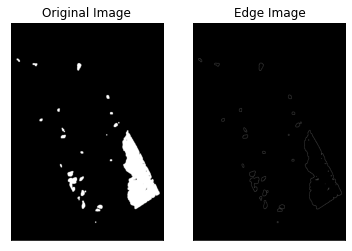

In [ ]:
#img = cv.imread('gdrive/My Drive/test.bmp',0)
img = thresh
edges = cv.Canny(img,100,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray', aspect='auto')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray', aspect='auto')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
indices = np.where(edges != [0])
coordinates = zip(indices[0], indices[1])
print(list(coordinates))

[(259, 48), (259, 49), (259, 50), (259, 51), (259, 52), (259, 53), (259, 54), (259, 55), (259, 56), (259, 57), (260, 46), (260, 47), (260, 58), (260, 59), (261, 46), (261, 59), (261, 60), (262, 45), (262, 60), (262, 61), (263, 45), (263, 61), (263, 62), (264, 45), (264, 62), (264, 63), (265, 45), (265, 63), (265, 64), (266, 45), (266, 64), (266, 65), (267, 45), (267, 66), (267, 67), (268, 45), (268, 68), (268, 69), (269, 46), (269, 69), (269, 70), (270, 46), (270, 47), (270, 70), (271, 47), (271, 48), (271, 71), (272, 48), (272, 49), (272, 50), (272, 71), (272, 72), (273, 51), (273, 52), (273, 53), (273, 54), (273, 72), (274, 55), (274, 56), (274, 72), (275, 56), (275, 57), (275, 72), (276, 57), (276, 72), (277, 58), (277, 72), (278, 58), (278, 72), (279, 59), (279, 72), (280, 59), (280, 72), (281, 60), (281, 72), (282, 60), (282, 61), (282, 72), (283, 61), (283, 62), (283, 63), (283, 64), (283, 65), (283, 66), (283, 67), (283, 68), (283, 69), (283, 70), (283, 71), (283, 72), (292, 181